# Import Libraries

In [2]:
pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     -------------- ----------------------- 112.6/293.3 kB 3.3 MB/s eta 0:00:01
     ------------------------------- ------ 245.8/293.3 kB 3.8 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Import the Dataset

In [24]:
data=pd.read_csv('loan-test-ready.csv')

# Summarizing the dataset

In [25]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [26]:
data.shape

(367, 13)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan_Status        367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [28]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


## Categorical variables 

In [29]:
categorical_variables=['Gender','Married','Dependents','Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
print('Categorical variable are :\n')
for i in range (len(categorical_variables)):
    print(categorical_variables[i])

Categorical variable are :

Gender
Married
Dependents
Education
Self_Employed
Credit_History
Property_Area
Loan_Status


# Married or not 

# Is there some missing values in my dataset ?

In [30]:
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

# Replace the missing values

Categorical variables

In [31]:
data.Gender.fillna(data.Gender.mode()[0],inplace=True)
data.Married.fillna(data.Married.mode()[0],inplace=True)
data.Dependents.fillna(data.Dependents.mode()[0],inplace=True)
data.Self_Employed.fillna(data.Self_Employed.mode()[0],inplace=True)
data.Credit_History.fillna(data.Credit_History.mode()[0],inplace=True)

Numerical variables

In [32]:
data.LoanAmount.fillna(data.LoanAmount.median(), inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.median(), inplace=True)

In [33]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

no more missing values

# Get_dummies for Categorical Variables

In [34]:
dummies1=pd.get_dummies(data['Gender'])
dummies2=pd.get_dummies(data['Married'])
dummies2=dummies2.rename(columns = {'Yes':'Married_yes','No':'NotMarried'})
dummies3=pd.get_dummies(data['Dependents'])
dummies3=dummies3.rename(columns = {'0': 'Dependents_0','1': 'Dependents_1','2': 'Dependents_2','3+': 'Dependents_3+'})
dummies4=pd.get_dummies(data['Education'])
dummies5=pd.get_dummies(data['Self_Employed'])
dummies5=dummies5.rename(columns = {'Yes':'Self_Employed_yes','No':'NotSelf_Employed'})
dummies6=pd.get_dummies(data['Property_Area'])

In [35]:
data= pd.concat([data,dummies1],axis=1)
data= pd.concat([data,dummies2],axis=1)
data= pd.concat([data,dummies3],axis=1)
data= pd.concat([data,dummies4],axis=1)
data= pd.concat([data,dummies5],axis=1)
data= pd.concat([data,dummies6],axis=1)


data=data.drop(['Loan_ID','Gender','Married','Property_Area','Dependents','Self_Employed','Education','NotMarried','NotSelf_Employed','Not Graduate','Female'] , axis=1)

# Replace 'Y' and 'N' in the target variable to 1 and 0

In [36]:
data['Loan_Status']= data['Loan_Status'].replace(['Y'],1)
data['Loan_Status']= data['Loan_Status'].replace(['N'],0)

# My dataset after all the modifications

In [37]:
data.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Married_yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Graduate,Self_Employed_yes,Rural,Semiurban,Urban
0,5720,0,110.0,360.0,1.0,1,True,True,True,False,False,False,True,False,False,False,True
1,3076,1500,126.0,360.0,1.0,1,True,True,False,True,False,False,True,False,False,False,True
2,5000,1800,208.0,360.0,1.0,1,True,True,False,False,True,False,True,False,False,False,True
3,2340,2546,100.0,360.0,1.0,1,True,True,False,False,True,False,True,False,False,False,True
4,3276,0,78.0,360.0,1.0,1,True,False,True,False,False,False,False,False,False,False,True
5,2165,3422,152.0,360.0,1.0,1,True,True,True,False,False,False,False,True,False,False,True
6,2226,0,59.0,360.0,1.0,1,False,False,False,True,False,False,False,False,False,True,False
7,3881,0,147.0,360.0,0.0,0,True,True,False,False,True,False,False,False,True,False,False
8,13633,0,280.0,240.0,1.0,1,True,True,False,False,True,False,True,False,False,False,True
9,2400,2400,123.0,360.0,1.0,1,True,False,True,False,False,False,False,False,False,True,False


# Splitting the data-set into Training and Test Set

In [38]:
X=data.drop(columns='Loan_Status')
Y=pd.DataFrame(data['Loan_Status'])

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=3)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    367 non-null    int64  
 1   CoapplicantIncome  367 non-null    int64  
 2   LoanAmount         367 non-null    float64
 3   Loan_Amount_Term   367 non-null    float64
 4   Credit_History     367 non-null    float64
 5   Loan_Status        367 non-null    int64  
 6   Male               367 non-null    bool   
 7   Married_yes        367 non-null    bool   
 8   Dependents_0       367 non-null    bool   
 9   Dependents_1       367 non-null    bool   
 10  Dependents_2       367 non-null    bool   
 11  Dependents_3+      367 non-null    bool   
 12  Graduate           367 non-null    bool   
 13  Self_Employed_yes  367 non-null    bool   
 14  Rural              367 non-null    bool   
 15  Semiurban          367 non-null    bool   
 16  Urban              367 non

In [44]:
pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

^C
Note: you may need to restart the kernel to use updated packages.


In [45]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [46]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Married_yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Graduate,Self_Employed_yes,Rural,Semiurban,Urban
0,5720,0,110.0,360.0,1.0,1,True,True,True,False,False,False,True,False,False,False,True
1,3076,1500,126.0,360.0,1.0,1,True,True,False,True,False,False,True,False,False,False,True
2,5000,1800,208.0,360.0,1.0,1,True,True,False,False,True,False,True,False,False,False,True
3,2340,2546,100.0,360.0,1.0,1,True,True,False,False,True,False,True,False,False,False,True
4,3276,0,78.0,360.0,1.0,1,True,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,1,True,True,False,False,False,True,False,True,False,False,True
363,4158,709,115.0,360.0,1.0,1,True,True,True,False,False,False,True,False,False,False,True
364,3250,1993,126.0,360.0,1.0,1,True,False,True,False,False,False,True,False,False,True,False
365,5000,2393,158.0,360.0,1.0,0,True,True,True,False,False,False,True,False,True,False,False


# Try the Classifiers

In [47]:
classifier = )
classifier.fit(X_train,Y_train)
predictions = classifier.predict(X_test)
accuracyScores = accuracy_score(predictions, Y_test)
print(accuracyScores)

SyntaxError: unmatched ')' (617447607.py, line 1)

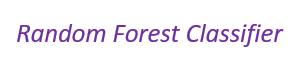

In [48]:
classifier = RandomForestClassifier(n_estimators=1000,max_features=15,max_depth=5,bootstrap=True)
classifier.fit(X_train,Y_train)
predictions = classifier.predict(X_test)
accuracyScores = accuracy_score(predictions, Y_test)
print(accuracyScores)

c:\Users\Medulla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0


In [49]:
predictions

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [50]:
import pickle

In [51]:
filename = 'Random_Forest.sav'
pickle.dump(classifier, open(filename, 'wb'))